In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import time
import threading
import psutil
import matplotlib.pyplot as plt

In [3]:
def matrix_multiply(A, B, result, start_row, end_row):
    for i in range(start_row, end_row):
        result[i] = np.dot(A[i], B)

In [4]:
def multiply_with_threads(A, B, num_threads):
    result = [None] * len(A)
    threads = []
    rows_per_thread = len(A) // num_threads

    for i in range(num_threads):
        start_row = i * rows_per_thread
        end_row = start_row + rows_per_thread if i < num_threads - 1 else len(A)
        thread = threading.Thread(target=matrix_multiply, args=(A, B, result, start_row, end_row))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    return result

In [5]:
activeThreads = os.cpu_count()    
print("Number of CPU threads:", activeThreads)

Number of CPU threads: 4


Number of threads		Time Elapsed
1				3.846776247024536
2				4.457491636276245
3				4.14766263961792
4				3.645381212234497
5				3.451453924179077
6				3.749652147293091
7				3.482546806335449
8				3.6034791469573975
9				3.5524139404296875


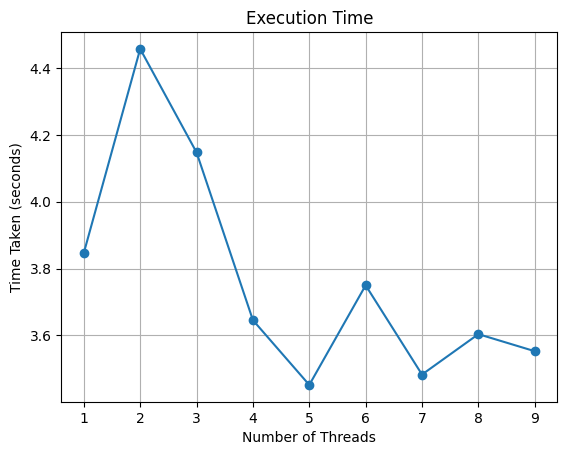

In [6]:
def main():
    matrix_size = 1000
    num_matrices = 100
    num_cores = psutil.cpu_count(logical=False)
    max_threads = 9

    matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
    constant_matrix = np.random.rand(matrix_size, matrix_size)

    execution_times = []
    print("Number of threads\t\tTime Elapsed")
    for num_threads in range(1, max_threads + 1):
        start_time = time.time()
        _ = multiply_with_threads(matrices, constant_matrix, num_threads)
        end_time = time.time()
        elapsed_time = end_time - start_time
        execution_times.append(elapsed_time)
        print(f"{num_threads}\t\t\t\t{elapsed_time}")

    plt.plot(range(1, max_threads + 1), execution_times, marker='o')
    plt.title("Execution Time")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time Taken (seconds)")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()